I want to use something like Market Basket Analysis to find tracks I usually listen to together. The results would be better if I had a way to track one listening session or at least the exact time I listened to it. I don't really expect to find anything interesting but let's have fun.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend import preprocessing

In [2]:
df = pd.read_csv('AppleMusicCSV.csv', sep=';')
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
original_df = df
df = df[['Date', 'Song']]
df

,Date,Song
0,2019-08-18,Hollywood
1,2019-08-18,Hermit the Frog
2,2019-08-18,Girls
3,2019-08-18,Obsessions
4,2019-08-18,I Am Not a Robot
...,...,...
44017,2023-11-28,Lover
44018,2023-11-28,Duchy
44019,2023-11-28,Mirage
44020,2023-11-28,Male Fantasy


Now I'll have to make it into one-hot-encoding somehow.

In [3]:
df['Song'].nunique()

4160

In [4]:
df_list = df.groupby('Date')['Song'].apply(list)
df_np = df_list.to_numpy()

In [5]:
encode_ = preprocessing.TransactionEncoder()
encode_arr = encode_.fit_transform(df_np)

print(encode_arr)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [6]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,!!!!!!!,"""Heroes""",#1 - WIELKOMIEJSKA BEZSENNOŚĆ,&burn,'Cause I'm a Man,'Til You're Mine,'tis the damn season,((home movie: rockets)),((home movie: shoes on)),(Dream),...,"Symphonie-Orchester Berlin - Piano Concerto No. 3 in D Minor, Op. 30: 3. Finale (Alla Breve)",Séguin - La Valse,"Xavier Roth - Introduction & Rondo Capriccioso in A Minor, Op. 28","Xavier Roth - Poème for Violin and Orchestra in E flat Major, Op. 25",Yo - Time of Our Lives,"Yo Ma & Kenneth Cooper - Sonata No. 2 in D Major for Cello and Harpsichord, BWV 1028: III. Andante",Z & Kanye West - Lift Off (feat. Beyoncé),fa - Scooby Doo Where Are You (Remix),ha - Take On Me (2015 Remastered Version),"hope - P.O.P (Piece of Peace), Pt. 1"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1479,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


First I'll find the most frequent sets which means that I have to set a minimum support. Support is the fraction of days that contain a set of songs.

In [7]:
frequent_itemsets = apriori(encode_df, min_support=0.04, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending = False)
frequent_itemsets

,support,itemsets
102,0.127444,( Venice Bitch)
56,0.118004,( Love song)
124,0.104518,(505)
22,0.099798,( Cinnamon Girl)
34,0.093055,( Fourth of July)
...,...,...
113,0.040459,( Zielony samochód)
105,0.040459,( Water Fountain)
183,0.040459,"( Cinnamon Girl, Venice Bitch, Mariners Apar..."
98,0.040459,( This Is the Life)


We'll look at some association rules. Where: \
**Support** is the fraction of days that contain a set \
**Confidence** for the rule A=>B is the percentage of days in which B is listened with A \
**Lift** is the correlation between A=>B. It shows how one item-set A effects the item-set B

In [8]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.7,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Cinnamon Girl),( Love song),0.099798,0.118004,0.085637,0.858108,7.271853,0.073861,6.215971,0.958100
1,( Love song),( Cinnamon Girl),0.118004,0.099798,0.085637,0.725714,7.271853,0.073861,3.281988,0.977877
2,( How to disappear),( Love song),0.074848,0.118004,0.062036,0.828829,7.023732,0.053204,5.152713,0.927011
3,"( Venice Bitch, Love song)",( Cinnamon Girl),0.074174,0.099798,0.058665,0.790909,7.925123,0.051262,4.305315,0.943826
4,"( Venice Bitch, Cinnamon Girl)",( Love song),0.065408,0.118004,0.058665,0.896907,7.600648,0.050946,8.555361,0.929210
...,...,...,...,...,...,...,...,...,...,...
212,"( Love song, Norman fucking Rockwell)",( Mariners Apartment Complex),0.042481,0.077546,0.040459,0.952381,12.281573,0.037164,19.371544,0.959331
213,"( Mariners Apartment Complex, Norman fucking ...",( Love song),0.047202,0.118004,0.040459,0.857143,7.263673,0.034889,6.173972,0.905048
214,( Norman fucking Rockwell),"( Love song, Mariners Apartment Complex)",0.055293,0.057316,0.040459,0.731707,12.766141,0.037289,3.513639,0.975613
215,"( Cinnamon Girl, Mariners Apartment Complex)",( Venice Bitch),0.052596,0.127444,0.040459,0.769231,6.035816,0.033755,3.781074,0.880641


We have learnt that I listened to the album Norman Fucking Rockwell a lot. Which is not really that interesting. So let's see which artists I listen to together

In [9]:
df = original_df[['Date', 'Artist']]
df = df.drop_duplicates()
df

,Date,Artist
0,2019-08-18,Marina and The Diamonds
16,2019-08-19,Marina and The Diamonds
17,2019-08-19,Billie Eilish & Khalid
31,2019-08-20,Marina and The Diamonds
42,2019-08-22,Marina and The Diamonds
...,...,...
43986,2023-11-28,Natalia Szroeder
43988,2023-11-28,Arctic Monkeys
43992,2023-11-28,Declan McKenna
43993,2023-11-28,Ralph Kaminski


In [10]:
df['Artist'].nunique()

1270

In [11]:
df_list = df.groupby('Date')['Artist'].apply(list)
df_np = df_list.to_numpy()

In [12]:
encode_ = preprocessing.TransactionEncoder()
encode_arr = encode_.fit_transform(df_np)

print(encode_arr)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [13]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,#ARG!,'In The Heights' Original Broadway Company & Mandy Gonzalez,*repeat repeat,100 gecs,21 Savage,24kGoldn,5 Seconds of Summer,A Great Big World & Christina Aguilera,A. G. Cook,ABBA,...,sanah & Vito Bambino,twenty one pilots,urbanski,will.i.am,Édith Piaf,Łąki Łan,Żabson,Егор Крид,데이빗 힐러,유상록
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1479,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Please ignore that #ARG! is a song.

In [14]:
frequent_itemsets = apriori(encode_df, min_support=0.09, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending = False)
frequent_itemsets

,support,itemsets
8,0.574511,(Lana Del Rey )
2,0.293324,(Arctic Monkeys )
11,0.248146,(Mitski )
4,0.194875,(Billie Eilish )
16,0.184086,(Taylor Swift )
22,0.180715,"(Arctic Monkeys , Lana Del Rey )"
26,0.175995,"(Lana Del Rey , Mitski )"
15,0.158463,(Sufjan Stevens )
24,0.142279,"(Lana Del Rey , Billie Eilish )"
14,0.141605,(Ralph Kaminski )


I guess Lana del Rey goes with anything

In [21]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.1,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Arctic Monkeys ),(Lana Del Rey ),0.293324,0.574511,0.180715,0.616092,1.072376,0.012197,1.108309,0.095505
1,(Lana Del Rey ),(Arctic Monkeys ),0.574511,0.293324,0.180715,0.314554,1.072376,0.012197,1.030972,0.158621
2,(Lana Del Rey ),(Mitski ),0.574511,0.248146,0.175995,0.306338,1.234509,0.033432,1.083892,0.446454
3,(Mitski ),(Lana Del Rey ),0.248146,0.574511,0.175995,0.709239,1.234509,0.033432,1.463364,0.252657
4,(Lana Del Rey ),(Billie Eilish ),0.574511,0.194875,0.142279,0.247653,1.270826,0.030321,1.070150,0.500860
5,(Billie Eilish ),(Lana Del Rey ),0.194875,0.574511,0.142279,0.730104,1.270826,0.030321,1.576491,0.264692
6,(Sufjan Stevens ),(Lana Del Rey ),0.158463,0.574511,0.115307,0.727660,1.266572,0.024268,1.562342,0.250098
7,(Lana Del Rey ),(Sufjan Stevens ),0.574511,0.158463,0.115307,0.200704,1.266572,0.024268,1.052849,0.494648
8,(Taylor Swift ),(Lana Del Rey ),0.184086,0.574511,0.111261,0.604396,1.052017,0.005501,1.075541,0.060601
9,(Lana Del Rey ),(Taylor Swift ),0.574511,0.184086,0.111261,0.193662,1.052017,0.005501,1.011875,0.116208


I think it's really fun even if we've mostly learnt that I listen to Lana del Rey a lot.

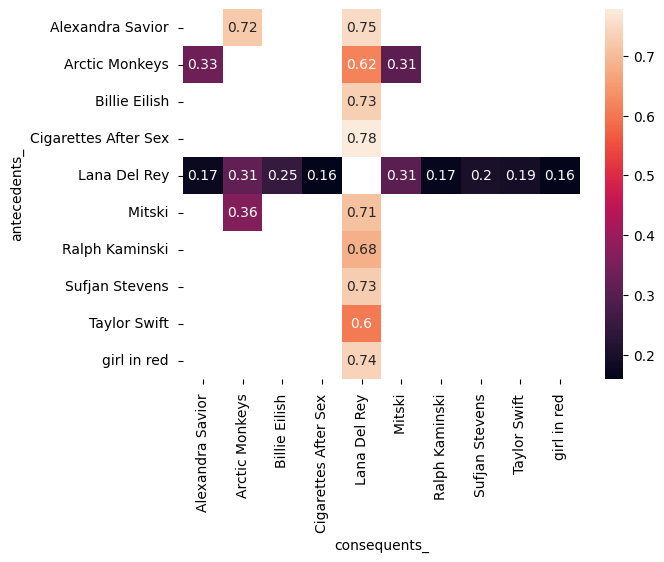

In [24]:
rules['antecedents_'] = rules['antecedents'].apply(lambda s: ','.join(list(s))).astype("unicode")
rules['consequents_'] = rules['consequents'].apply(lambda s: ','.join(list(s))).astype("unicode")
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules.pivot(index='antecedents_', columns='consequents_', values='confidence')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

It's fun but I'll do something controversial and remove Lana del Rey

In [31]:
df = original_df[['Date', 'Artist']]
df = df.drop_duplicates()
df = df.drop(df[df['Artist'] == 'Lana Del Rey '].index)
df

,Date,Artist
0,2019-08-18,Marina and The Diamonds
16,2019-08-19,Marina and The Diamonds
17,2019-08-19,Billie Eilish & Khalid
31,2019-08-20,Marina and The Diamonds
42,2019-08-22,Marina and The Diamonds
...,...,...
43986,2023-11-28,Natalia Szroeder
43988,2023-11-28,Arctic Monkeys
43992,2023-11-28,Declan McKenna
43993,2023-11-28,Ralph Kaminski


In [33]:
df_list = df.groupby('Date')['Artist'].apply(list)
df_np = df_list.to_numpy()

encode_ = preprocessing.TransactionEncoder()
encode_arr = encode_.fit_transform(df_np)

encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)

In [37]:
frequent_itemsets = apriori(encode_df, min_support=0.07, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending = False)
frequent_itemsets

,support,itemsets
2,0.300830,(Arctic Monkeys )
13,0.254495,(Mitski )
4,0.199862,(Billie Eilish )
18,0.188797,(Taylor Swift )
17,0.162517,(Sufjan Stevens )
16,0.145228,(Ralph Kaminski )
1,0.137621,(Alexandra Savior )
14,0.133472,(Myslovitz )
23,0.131397,(girl in red )
6,0.121024,(Cigarettes After Sex )


In [42]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.01,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Arctic Monkeys ),(Alexandra Savior ),0.300830,0.137621,0.099585,0.331034,2.405406,0.058185,1.289123,0.835662
1,(Alexandra Savior ),(Arctic Monkeys ),0.137621,0.300830,0.099585,0.723618,2.405406,0.058185,2.529725,0.677509
2,(Arctic Monkeys ),(Mitski ),0.300830,0.254495,0.092669,0.308046,1.210420,0.016110,1.077391,0.248638
3,(Mitski ),(Arctic Monkeys ),0.254495,0.300830,0.092669,0.364130,1.210420,0.016110,1.099550,0.233185
4,(Arctic Monkeys ),(Myslovitz ),0.300830,0.133472,0.087828,0.291954,2.187386,0.047676,1.223831,0.776397
5,(Myslovitz ),(Arctic Monkeys ),0.133472,0.300830,0.087828,0.658031,2.187386,0.047676,2.044543,0.626446
6,(Arctic Monkeys ),(Ralph Kaminski ),0.300830,0.145228,0.085754,0.285057,1.962824,0.042065,1.195581,0.701589
7,(Ralph Kaminski ),(Arctic Monkeys ),0.145228,0.300830,0.085754,0.590476,1.962824,0.042065,1.707276,0.573873
8,(Arctic Monkeys ),(Taylor Swift ),0.300830,0.188797,0.078147,0.259770,1.375925,0.021351,1.095880,0.390772
9,(Taylor Swift ),(Arctic Monkeys ),0.188797,0.300830,0.078147,0.413919,1.375925,0.021351,1.192959,0.336804


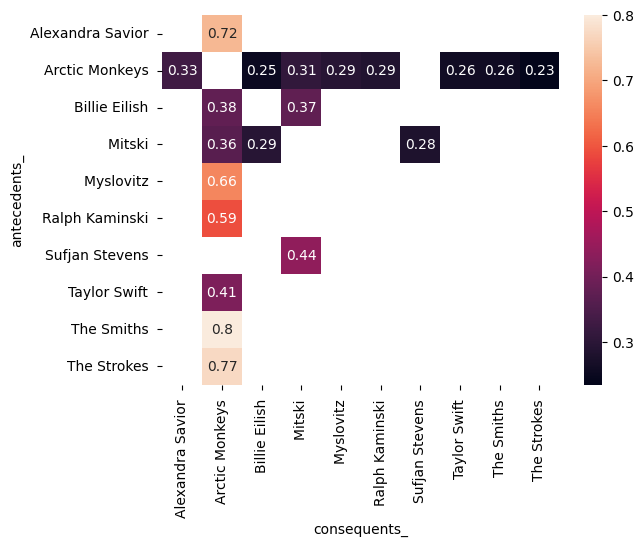

In [43]:
rules['antecedents_'] = rules['antecedents'].apply(lambda s: ','.join(list(s))).astype("unicode")
rules['consequents_'] = rules['consequents'].apply(lambda s: ','.join(list(s))).astype("unicode")

pivot = rules.pivot(index='antecedents_', columns='consequents_', values='confidence')

sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

I will never escape. Artic Monkeys is in fact my second most listened to artist. Nonetheless it was fun.